In [1]:
from neuralprophet import NeuralProphet
import pandas as pd
import time

In [2]:
# Load and preprocess the data
dataset = pd.read_csv("BTCprice.csv")

In [3]:
# NeuralProphet requires the data in a specific format with 'ds' and 'y' columns
dataset = dataset[['Date', 'Close']]
dataset.columns = ['ds', 'y']

In [4]:
# Implement train/test split
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_data, test_data = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]

In [5]:
# Build the NeuralProphet model
model = NeuralProphet(
    batch_size=1,
    epochs=100,
)

In [6]:
# Train the NeuralProphet model
start_time = time.time()
model.fit(train_data, freq='D')
end_time = time.time()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


  0%|          | 0/129 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.83E-02, min: 9.47E-02


  0%|          | 0/129 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.11E-01, min: 3.46E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.66E-02
Epoch[100/100]: 100%|████| 100/100 [02:23<00:00,  1.44s/it, SmoothL1Loss=0.00402, MAE=3.75e+3, RMSE=3.75e+3, RegLoss=0]


In [7]:
# Testing the NeuralProphet model
future = model.make_future_dataframe(test_data, periods=test_size)
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


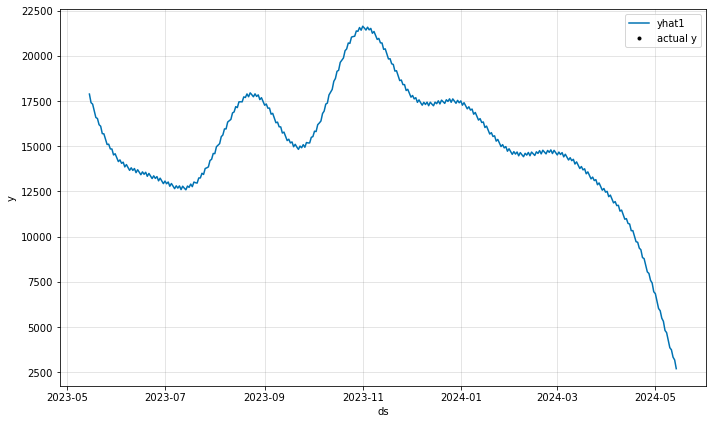

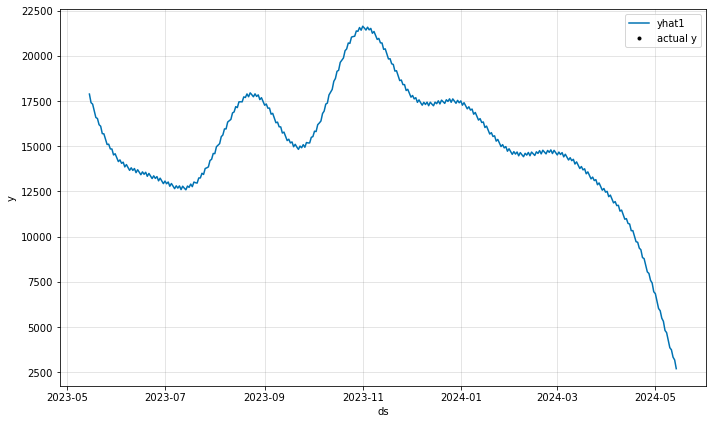

In [8]:
# Plot the results for the test set
model.plot(forecast)

In [9]:
# Calculate the MAPE and RMSE
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

WARNING - (py.warnings._showwarnmsg) - C:\Users\rty67\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



In [10]:
# Get the true and predicted prices
true_prices = test_data['y'].values
predicted_prices = forecast['yhat1'][-len(test_data):].values

In [11]:
# Calculate the MAPE
mape = mean_absolute_percentage_error(true_prices, predicted_prices) 

In [12]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(true_prices, predicted_prices))

In [18]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Root Mean Squared Error (RMSE): 10090.528381353472
Mean Absolute Percentage Error (MAPE): 0.32%


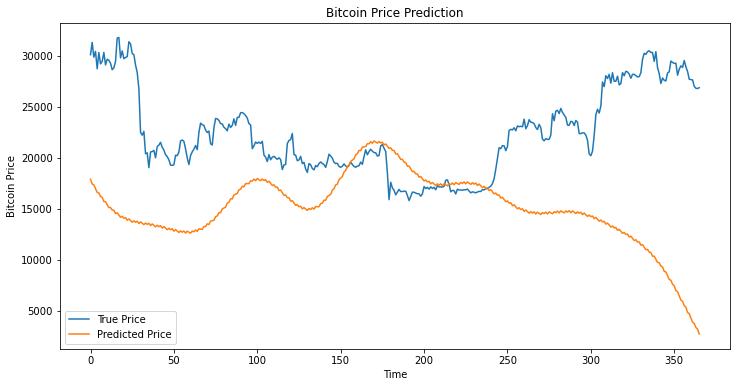

In [14]:
import matplotlib.pyplot as plt
# Plot the results for the test set
plt.figure(figsize=(12, 6))
plt.plot(true_prices, label='True Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

In [15]:
df_describe = pd.DataFrame(true_prices)
df_describe.describe()

,0
count,366.000000
mean,22414.289634
std,4279.197948
min,15787.284180
25%,19325.394043
50%,21531.104492
75%,24719.875000
max,31792.310547


In [16]:
df_describe = pd.DataFrame(predicted_prices)
df_describe.describe()

,0
count,366.000000
mean,15113.653590
std,3449.534574
min,2698.450684
25%,13480.218994
50%,15070.557617
75%,17407.146484
max,21637.080078


In [17]:
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 144.41946148872375 seconds
